# 3. Exploratory Data Analysis

## Imports

In [1]:
#Import required modules

import os
import glob

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import matplotlib.dates as mdates

from pathlib import Path

import ppscore as pps

## Read Data

In [2]:
# Change directory one step back and save as the root directory
ROOT_DIR = os.path.normpath(os.getcwd() + os.sep + os.pardir)
print(ROOT_DIR)

D:\gitProjects\springboard_capstone_1\Springboard_Capstone_01


In [3]:
#Define file name and location
dataset_csv = 'step2_data_wrangling_wti_price.csv'
path = '\\data\\interim\\'
f = ROOT_DIR + path + dataset_csv
print(f)

D:\gitProjects\springboard_capstone_1\Springboard_Capstone_01\data\interim\step2_data_wrangling_wti_price.csv


In [4]:
df = pd.read_csv(f)

In [5]:
#convert 'Date' column to date format
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d', errors="raise")

#set Date as index
df.set_index('Date', drop=True, inplace=True)

## Data explorotary

In [6]:
TARGET_FEATURE = 'wti_price'

### Check dataframe

In [7]:
display(df.head(7).round(2).T)

Date,2000-01-01,2000-02-01,2000-03-01,2000-04-01,2000-05-01,2000-06-01,2000-07-01
wti_price,27.26,29.37,29.84,25.72,28.79,31.82,29.70
oil_production_opec,26.01,26.68,26.61,27.52,28.05,27.64,27.91
oil_production_nonopec,46.90,46.82,46.94,46.62,46.62,46.78,47.05
oil_production_world,73854.24,74470.54,74439.05,75116.13,75639.56,75360.22,75983.05
henry_hub_ng_price,2.42,2.66,2.79,3.04,3.59,4.29,3.99
oil_production_us,5.78,5.85,5.92,5.85,5.85,5.82,5.74
petrol_consumption_oecd,47.23,50.23,49.36,46.29,47.34,47.96,47.25
petrol_consumption_nonoecd,28.29,28.77,28.53,28.13,28.22,28.27,28.54
us_cpi,1.69,1.70,1.71,1.71,1.71,1.72,1.73
us_ppi,1.29,1.30,1.31,1.31,1.32,1.32,1.33


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 271 entries, 2000-01-01 to 2022-07-01
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   wti_price                         271 non-null    float64
 1   oil_production_opec               271 non-null    float64
 2   oil_production_nonopec            271 non-null    float64
 3   oil_production_world              271 non-null    float64
 4   henry_hub_ng_price                271 non-null    float64
 5   oil_production_us                 271 non-null    float64
 6   petrol_consumption_oecd           271 non-null    float64
 7   petrol_consumption_nonoecd        271 non-null    float64
 8   us_cpi                            271 non-null    float64
 9   us_ppi                            271 non-null    float64
 10  us_ppi_petroleum                  271 non-null    float64
 11  us_pmi                            271 non-null    fl

### Traget feature

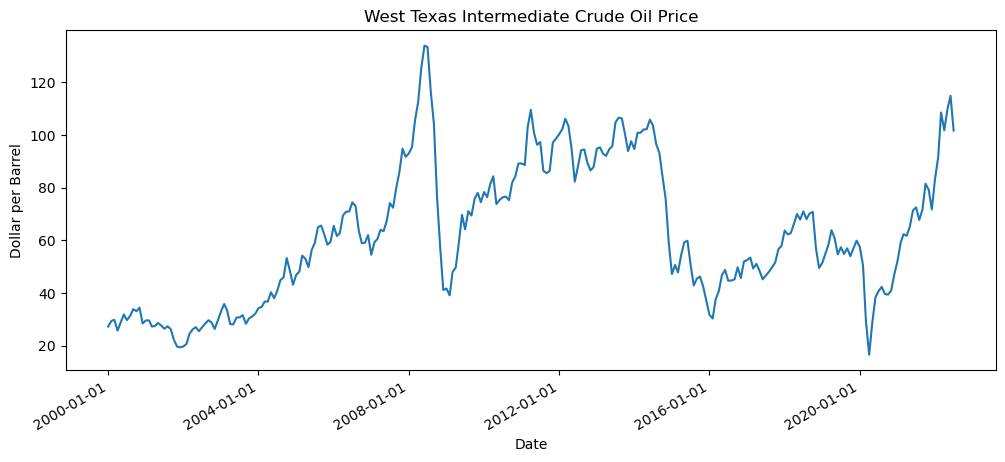

In [19]:
#Plot the target feature
fig, ax = plt.subplots(figsize = (12,5))
sns.lineplot(data = df, x = df.index, y = TARGET_FEATURE).set(ylabel = 'Dollar per Barrel', title = 'West Texas Intermediate Crude Oil Price')

# assign locator and formatter for the xaxis ticks.
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# put the labels at 45deg since they tend to be too long
fig.autofmt_xdate()

plt.show()

### Histograms

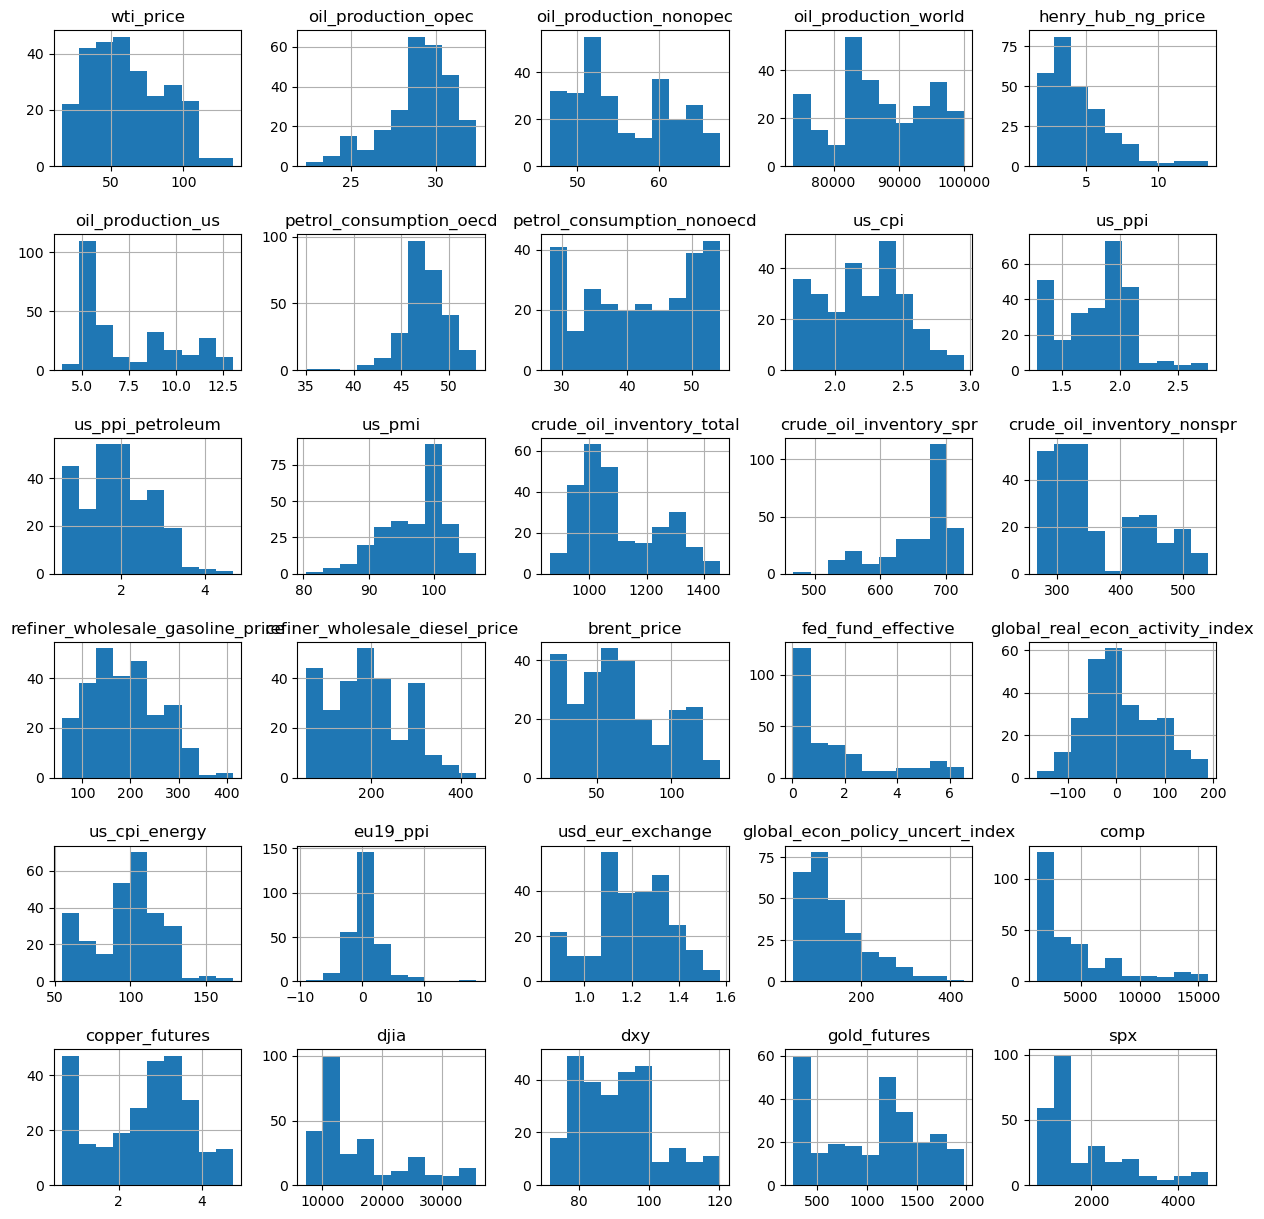

In [10]:
#Plot histogram of all  features
#Call plt.subplots_adjust() with an argument hspace=0.5 to adjust the spacing
#It's important you create legible and easy-to-read plots
df.hist(figsize=(15,15))
plt.subplots_adjust(hspace=0.5);

### Summary Statistics

In [11]:
display(df.describe().round(2).T)

,count,mean,std,min,25%,50%,75%,max
wti_price,271.0,62.07,26.09,16.55,40.86,59.04,82.10,133.88
oil_production_opec,271.0,29.02,1.97,22.35,28.14,29.28,30.42,32.39
oil_production_nonopec,271.0,55.65,5.95,46.62,50.88,54.34,60.71,67.46
oil_production_world,271.0,87080.57,7273.68,73854.24,82707.24,85934.43,94238.48,99918.89
henry_hub_ng_price,271.0,4.48,2.16,1.63,2.86,3.91,5.66,13.42
oil_production_us,271.0,7.46,2.49,3.97,5.45,5.88,9.39,13.00
petrol_consumption_oecd,271.0,47.48,2.32,35.02,46.21,47.42,48.95,52.88
petrol_consumption_nonoecd,271.0,42.07,8.41,28.13,34.25,42.93,50.18,54.32
us_cpi,271.0,2.22,0.30,1.69,1.97,2.24,2.42,2.95
us_ppi,271.0,1.81,0.30,1.29,1.59,1.88,2.01,2.75


### Scatter Plots

In [12]:
def plot_scatterplots(data, columns, target_feature, ncol=None, figsize=(15, 8)):
    '''This function creates scatterplots of crude oil prices against desired columns'''
    
    if ncol is None:
        ncol = len(columns)
        
    nrow = int(np.ceil(len(columns) / ncol))
    
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=1)
    
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = target_feature, data=data, alpha=0.5)
        ax.set(xlabel=col, ylabel= target_feature)
        
    nsubplots = nrow * ncol
    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [13]:
#define features to be plotted against WTI price
features = [item for item in df.columns if item not in TARGET_FEATURE]

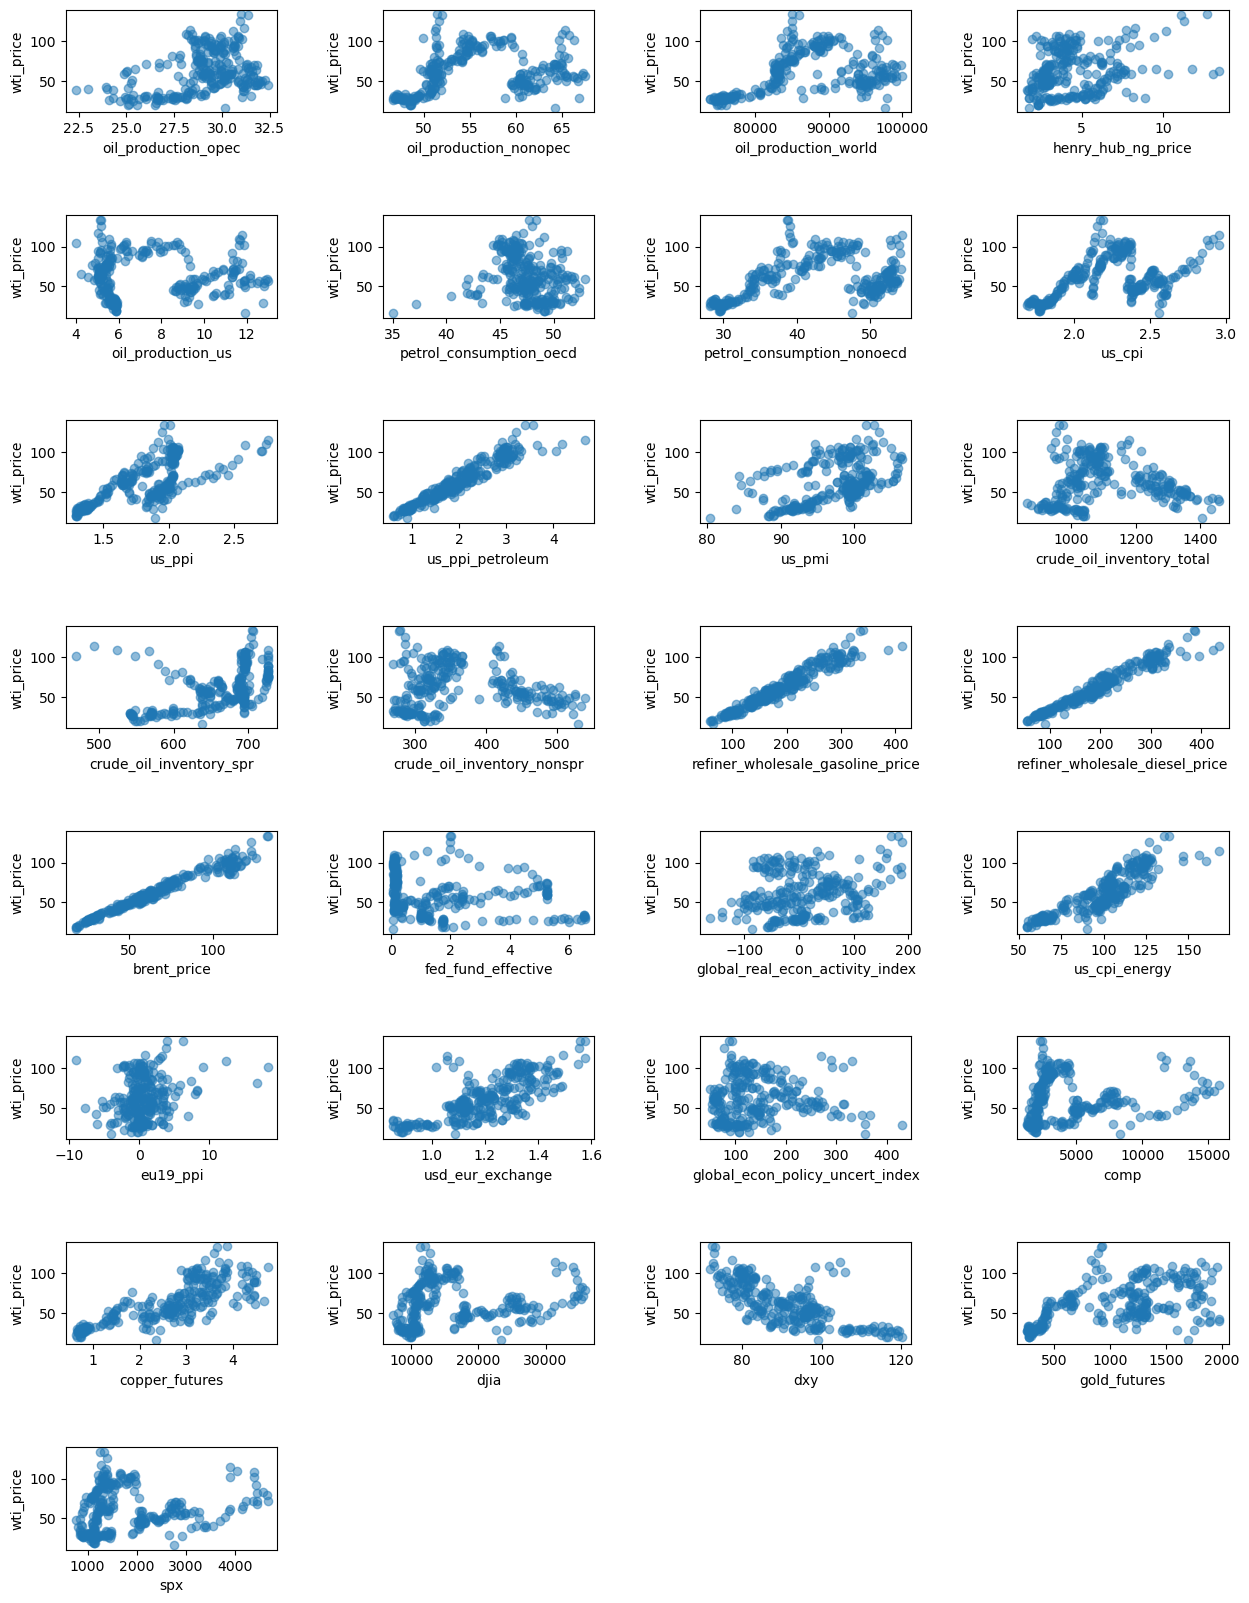

In [14]:
plot_scatterplots(df, features, TARGET_FEATURE,  ncol=4, figsize=(15, 20))

## Feature Engineering

### Feature Engineering Custom Functions

In [15]:
def count_over_thershold(li, bounding_limit: tuple):
    '''This function gets a list and print how many items are larger than a thersold'''
    
    #counters
    n = len(li)
    m = 0    
    for i in li:
        if i >= bounding_limit[1] or i < bounding_limit[0] :
            m +=1
    pct = 100.0*m/n
    print(f'{pct:1.2f}% of items ({m}/{n}) are out of {bounding_limit}')   

In [16]:
def highlight_out_of_range(data, bounding_limit: tuple):
    '''This functions gets PPS score for target feature and plot a bar plot'''
    lower_bound = bounding_limit[0]
    upper_bound = bounding_limit[1]
    
    #Plot the scores for a select feature from PPS Matrix
    data= data.sort_values(ascending = False)

    #The value > thershold will be show with a different color.
    #So, the plot colors will be dynamically set based on the data

    #Create and empty list of colors
    colors = []

    #Set color for ratio values
    #Set "red" if value is max, otherwise "blue" (as default)
    for index, value in data.items():
        if value >= upper_bound or value <= lower_bound:
            colors.append('#f77088') #red for max
        else:
            colors.append('#66aabb') #blue as default

    #set chart size
    fig = plt.figure(figsize = (15, 2))


    #Pass the x and height values with color set to bar plotter
    plt.bar(data.index,data.values, width = .8, color=colors)

    #Rotate the x labels for better visuzlaizarion
    plt.xticks(rotation=90)

    #Set labels
    plt.ylabel('PPS score')
    
    
    count_over_thershold(data, bounding_limit)

    #Show the plot
    plt.show()

In [17]:
def target_pps_score(df, feature):
    # Compute the PPS matrix
    matrix = pps.matrix(df)
    matrix_pps = matrix[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
    y_scores = matrix_pps[feature]
    
    y_scores.drop(TARGET_FEATURE, inplace = True)
    
    return y_scores

In [18]:
def target_corr_coeff(df, feature):
    
    # Compute the correlation matrix
    corr = df.corr()
    y_scores = corr[feature]
    
    y_scores.drop(TARGET_FEATURE, inplace = True)
    
    return y_scores

### Add price spread features

In [19]:
df.columns

Index(['wti_price', 'oil_production_opec', 'oil_production_nonopec',
       'oil_production_world', 'henry_hub_ng_price', 'oil_production_us',
       'petrol_consumption_oecd', 'petrol_consumption_nonoecd', 'us_cpi',
       'us_ppi', 'us_ppi_petroleum', 'us_pmi', 'crude_oil_inventory_total',
       'crude_oil_inventory_spr', 'crude_oil_inventory_nonspr',
       'refiner_wholesale_gasoline_price', 'refiner_wholesale_diesel_price',
       'brent_price', 'fed_fund_effective', 'global_real_econ_activity_index',
       'us_cpi_energy', 'eu19_ppi', 'usd_eur_exchange',
       'global_econ_policy_uncert_index', 'comp', 'copper_futures', 'djia',
       'dxy', 'gold_futures', 'spx'],
      dtype='object')

In [20]:
# Calcualte additional features.
df['wti_brent_price_spread'] = df['wti_price'] - df['brent_price']
df['wti_crack_spread'] = 2*df['refiner_wholesale_gasoline_price'] + df['refiner_wholesale_diesel_price'] - 3*df['wti_price']
df['brent_crack_spread'] = 2*df['refiner_wholesale_gasoline_price'] + df['refiner_wholesale_diesel_price'] - 3*df['brent_price']

# Drop unnecessary columns
df = df.drop(columns=['brent_price', 'refiner_wholesale_gasoline_price', 'refiner_wholesale_diesel_price'])

## Feature relationships

### Correlation matrix

In [21]:
def plot_corr_matrix (df, round_vals, mask = False):
    '''This function plots Correlation matrix'''
    
    # Compute the correlation matrix
    corr = df.corr()
    
    #Plot Corr matrix
    
    # Generate a mask for the upper triangle
    if mask:
        mask = np.triu(np.ones_like(corr, dtype=bool))
    
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(30, 15))

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr.round(round_vals), mask=mask, cmap='coolwarm', vmin = -1, vmax=1, center=0, annot=True,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}).set(title='Pearson Correlation Matrix')

    plt.show()

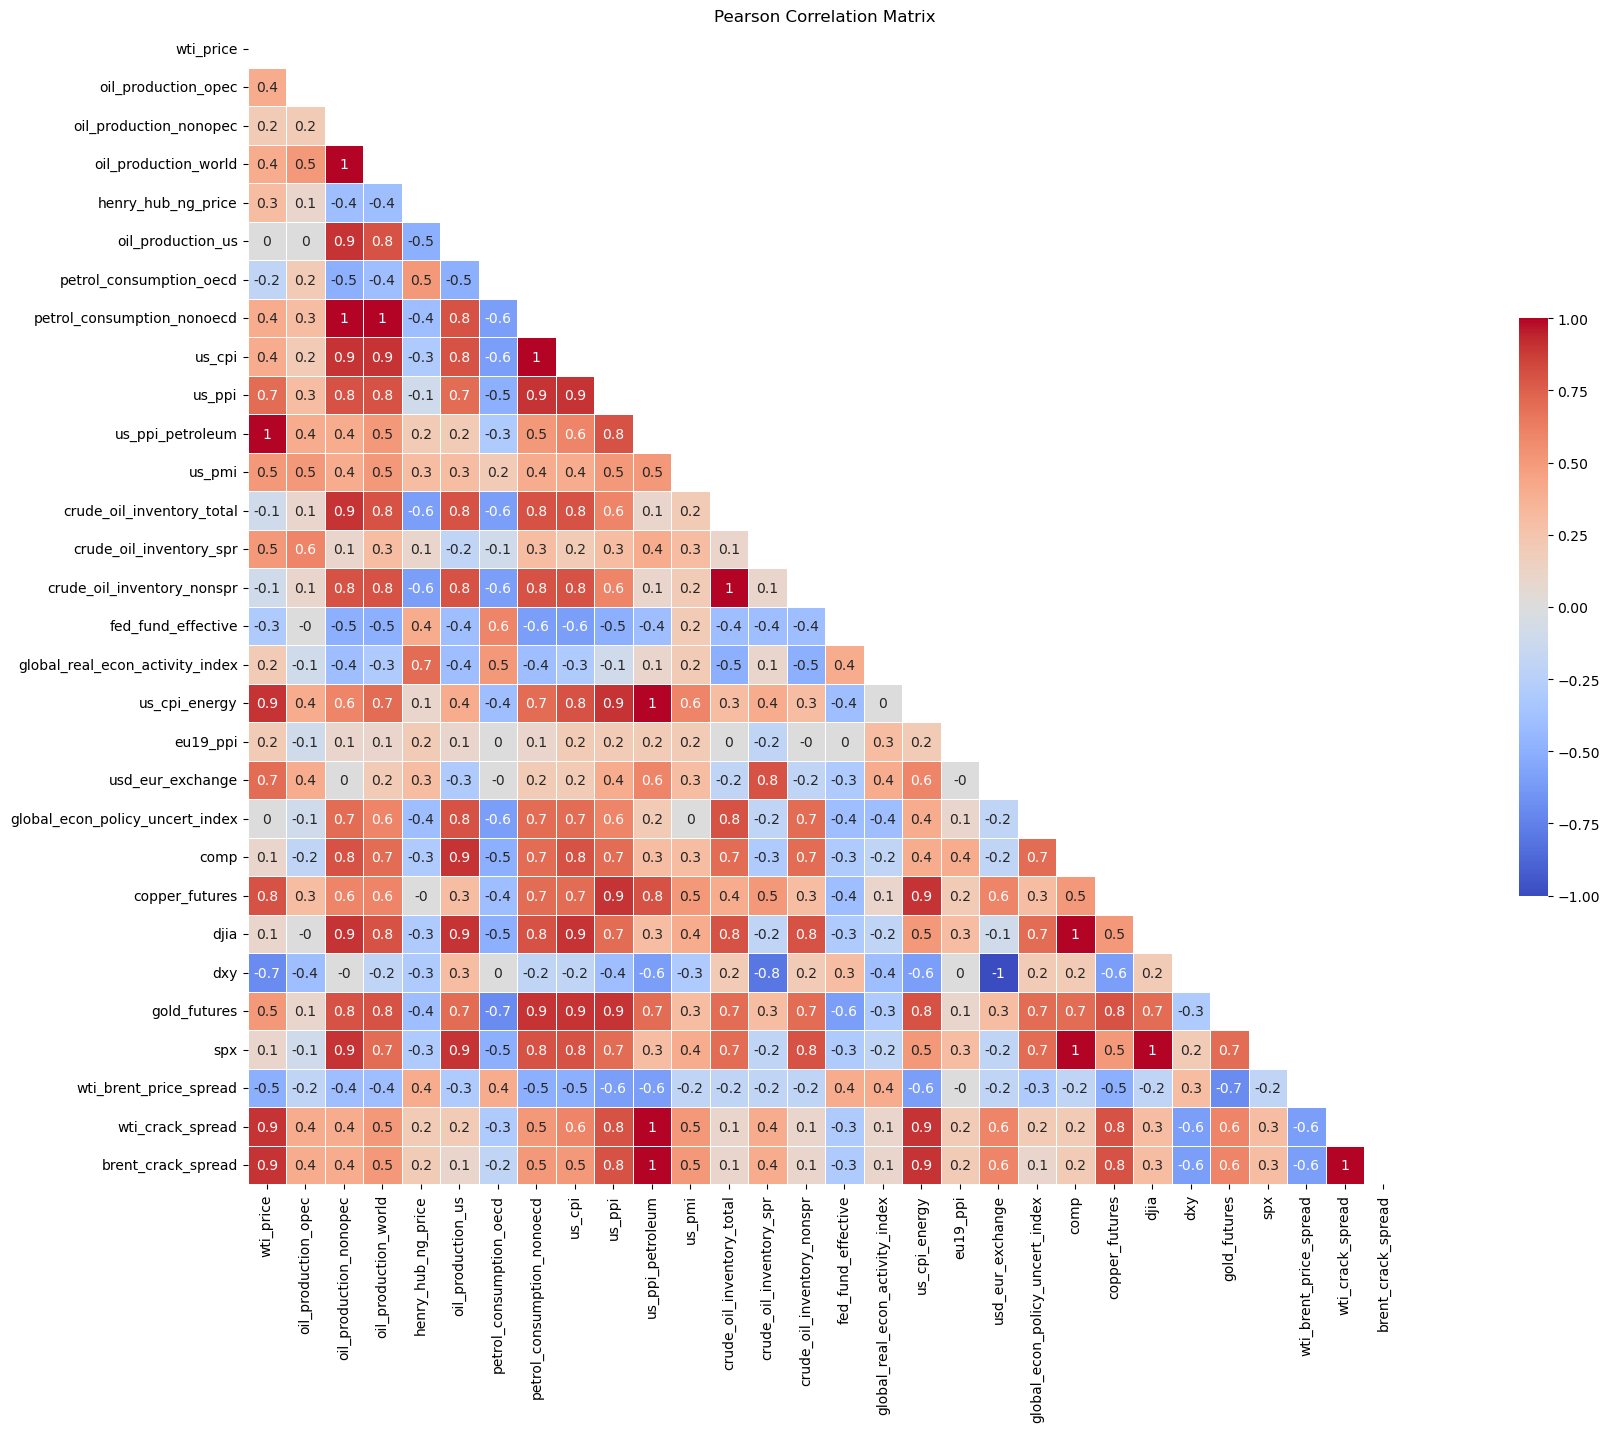

In [22]:
plot_corr_matrix(df, 1, True)

### PPS: Predictive Power Score

In [23]:
def plot_pps_matrix(df, round_vals, mask = False):
    '''This function gets a df and plot PPS score matrix'''
    
    # Compute the PPS matrix
    matrix = pps.matrix(df)

    #Plot PPS
    matrix_pps = matrix[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

    # Generate a mask for the upper triangle
    if mask:
        mask = np.triu(np.ones_like(matrix_pps, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(30, 15))

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(matrix_pps.round(round_vals), mask = mask, cmap="Blues", vmin = 0, vmax=1, center=0.5,
                square=True, linewidths=.5,annot=True, cbar_kws={"shrink": .5}).set(title='PPS Matrix')
    plt.show()


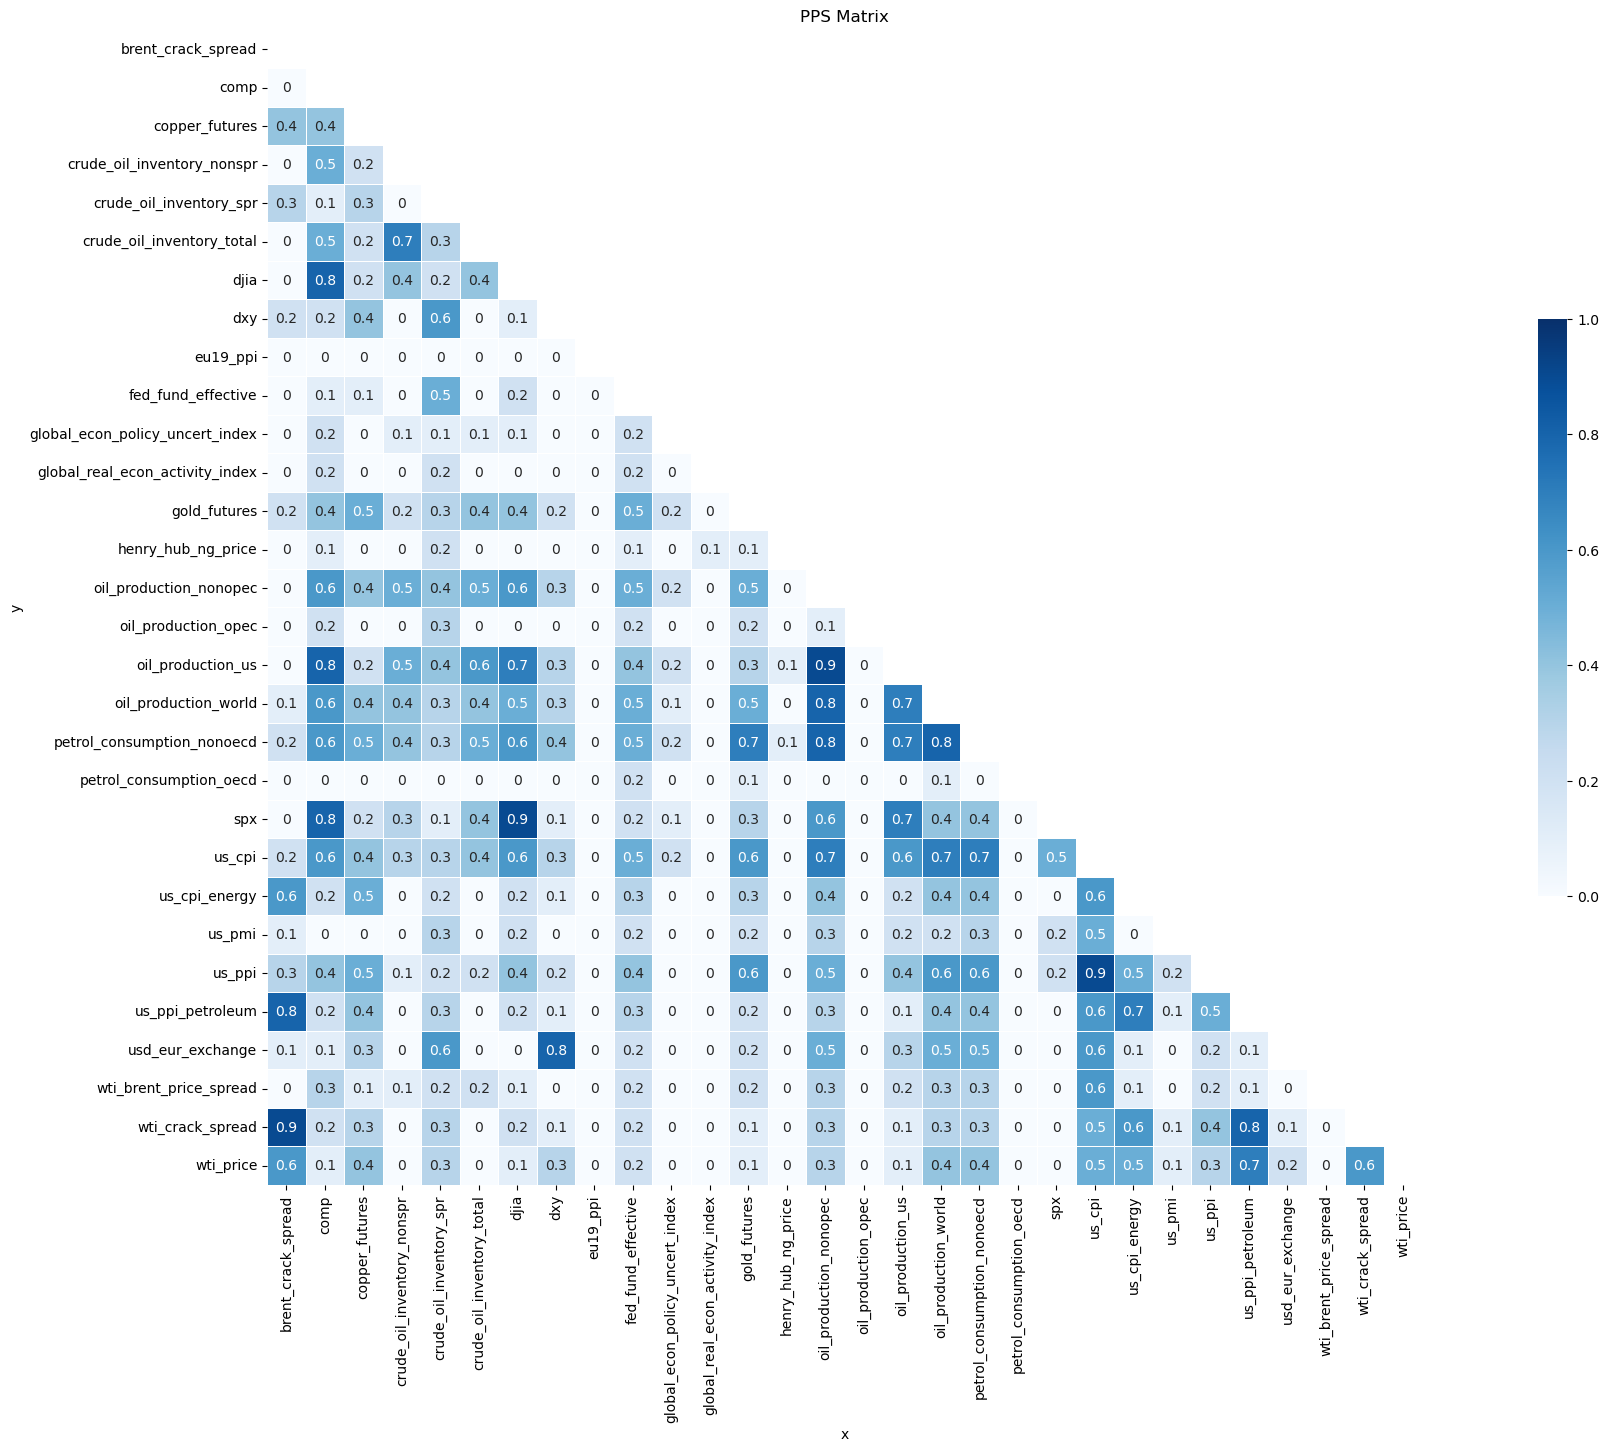

In [24]:
plot_pps_matrix(df, 1, True)

### Score assosciation with target feature

#### High PPS Score

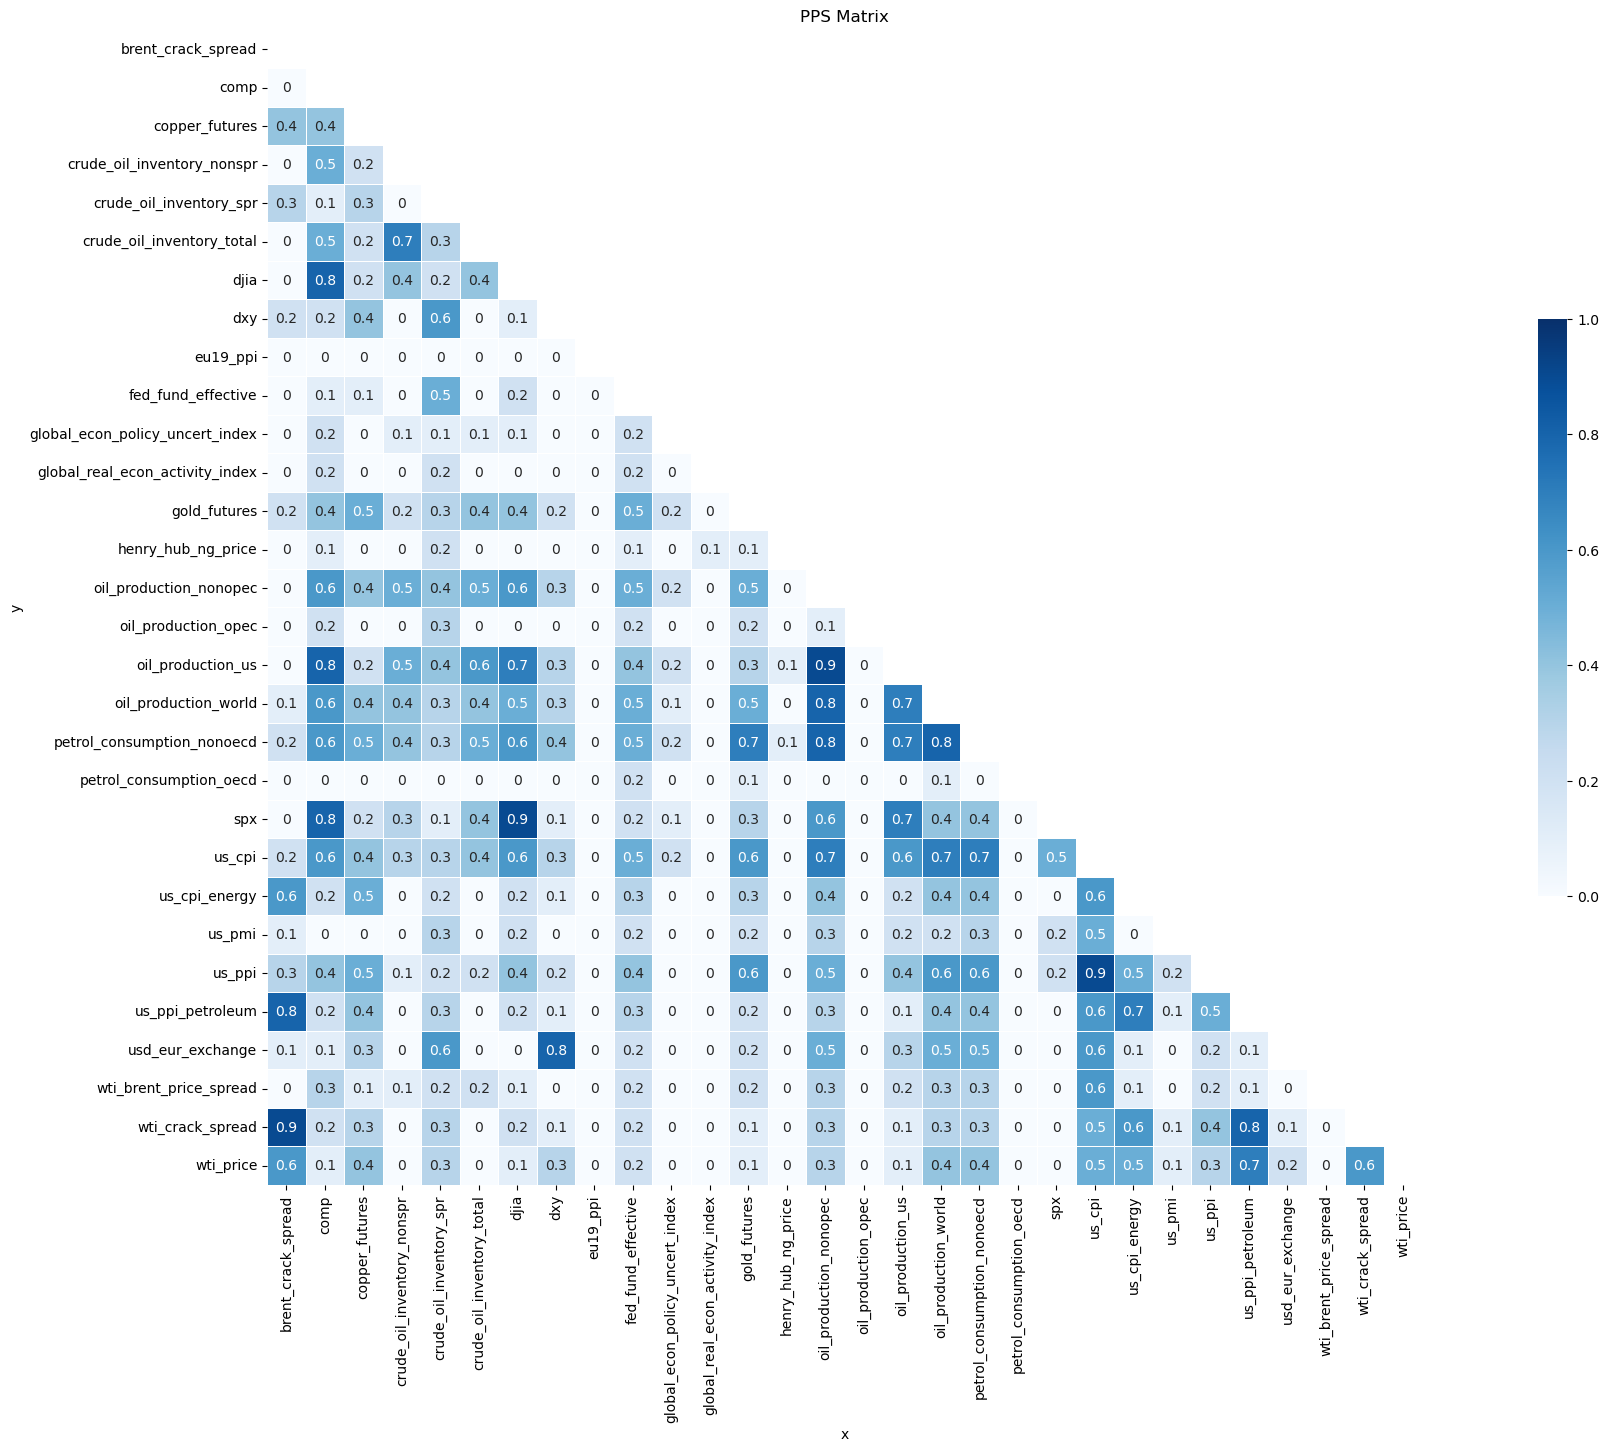

In [25]:
plot_pps_matrix(df, 1, True)

In [26]:
wti_pps_score = target_pps_score(df, TARGET_FEATURE)

6.90% of items (2/29) are out of (0, 0.6)


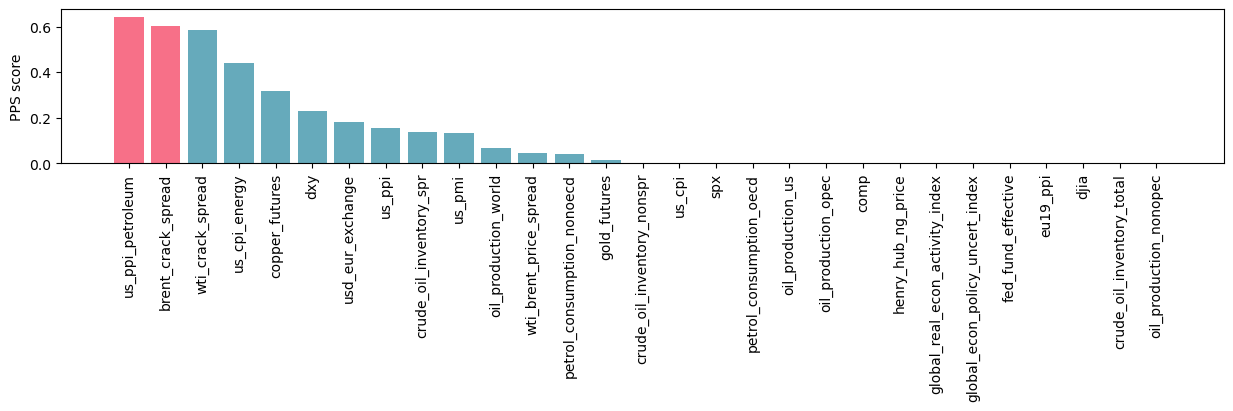

In [27]:
highlight_out_of_range(wti_pps_score, (0,0.6))

#### High Correlation Coeff

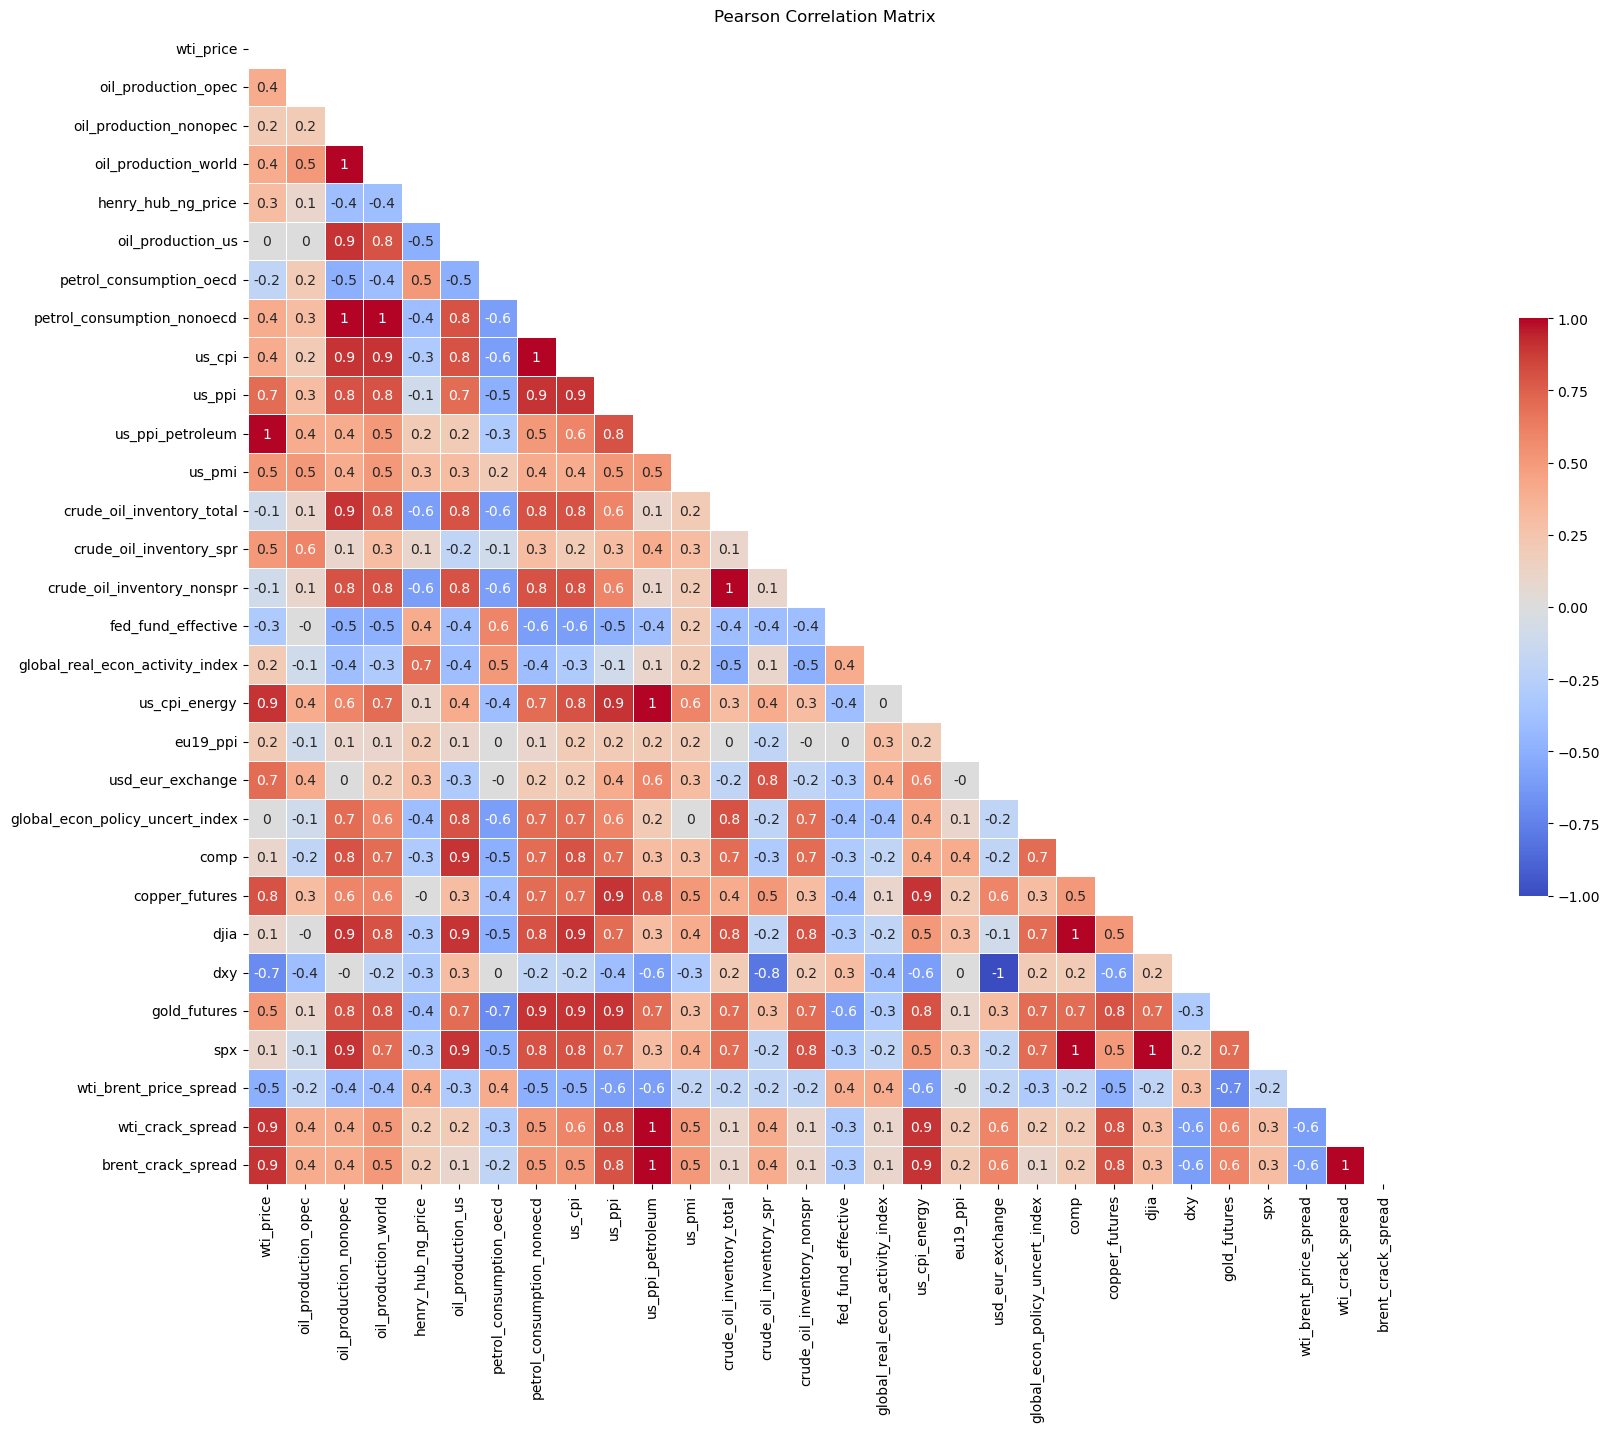

In [28]:
plot_corr_matrix(df, 1, True)

In [29]:
wti_corr_coeff = target_corr_coeff(df, TARGET_FEATURE)

27.59% of items (8/29) are out of (-0.6, 0.6)


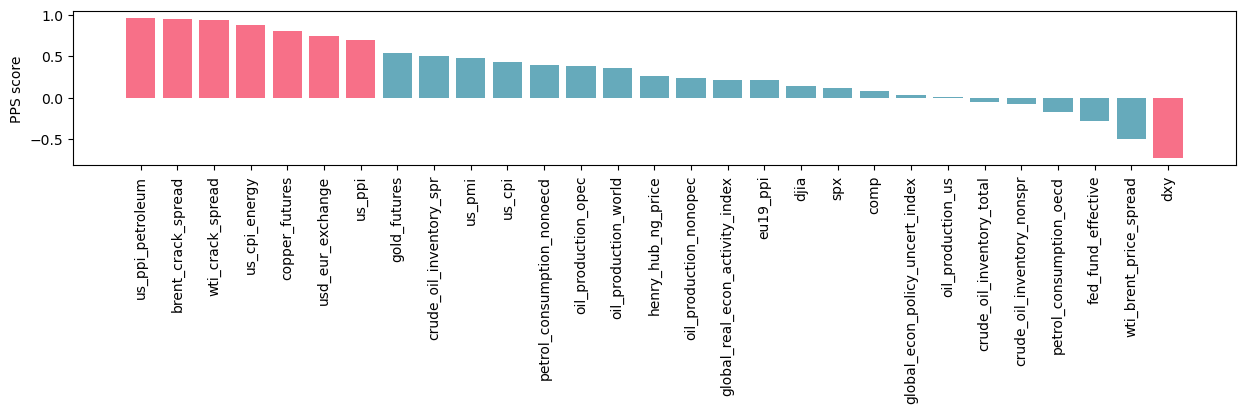

In [30]:
highlight_out_of_range(wti_corr_coeff, (-0.6,0.6))

## Store the data

In [31]:
# Change directory one step back and save as the root directory
ROOT_DIR = os.path.normpath(os.getcwd() + os.sep + os.pardir)

# Change direcotry to the 'data\raw' folder
path = ROOT_DIR + '\\data\\interim\\'

# Set a file name
file_save = path + 'step3_eda_wti_price.csv'
df.to_csv(file_save)

print('Save:\n', file_save)

Save:
 D:\gitProjects\springboard_capstone_1\Springboard_Capstone_01\data\interim\step3_eda_wti_price.csv
